# Regressão Linear


___


___
Carregando algumas bibliotecas:

In [4]:
%matplotlib inline
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.display import display  # Para ter melhor print.
from scipy import stats

___
## Índice

- [Questão 1](#q1) **Empresa de Marketing - Mídias Sociais**
    - [Item a](#q1_a)
    - [Item b](#q1_b)
    - [Item c](#q1_c)
- [Questão 2](#q2) **Seguro Saúde**
    - [Item a](#q2_a)
    - [Item b](#q2_b)
    - [Item c](#q2_c)
- [Questão 3](#q3) **Usina Termoelétrica**
    - [Item a](#q3_a)
    - [Item b](#q3_b)
    - [Item c](#q3_c)
    - [Item d](#q3_d)

___

<div id="q1"></div>

# Questão 1


<img src="questao2.jpg">

Fonte: https://lanspublicidade.com.br/empresa-midias-sociais/

Uma empresa de marketing pretende avaliar o impacto de três mídias publicitárias (youtube, facebook e jornal) nas suas vendas. 

Os dados contêm os gastos em publicidade feitas nessas três mídias: youtube, facebook e jornal (em milhares de dólares) junto com as vendas (em milhares de unidades). 

O dataframe a seguir contem os dados dos gastos nessas três mídias e da quantidade vendida, em um ano, de 200 franquias diferentes.

Adaptado de: [Marketing data set](https://rdrr.io/github/kassambara/datarium/man/marketing.html).


In [18]:
df = pd.read_excel("marketing.xlsx")

In [19]:
df.head(3)

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16


---

<div id="q1_a"></div>

**a)** Construa uma visualização adequada para analisar o impacto do gasto com cada mídia publicitária nas vendas.

Faça uso do `subplot()` para construir esses três gráficos adequadamente. Interprete-os.

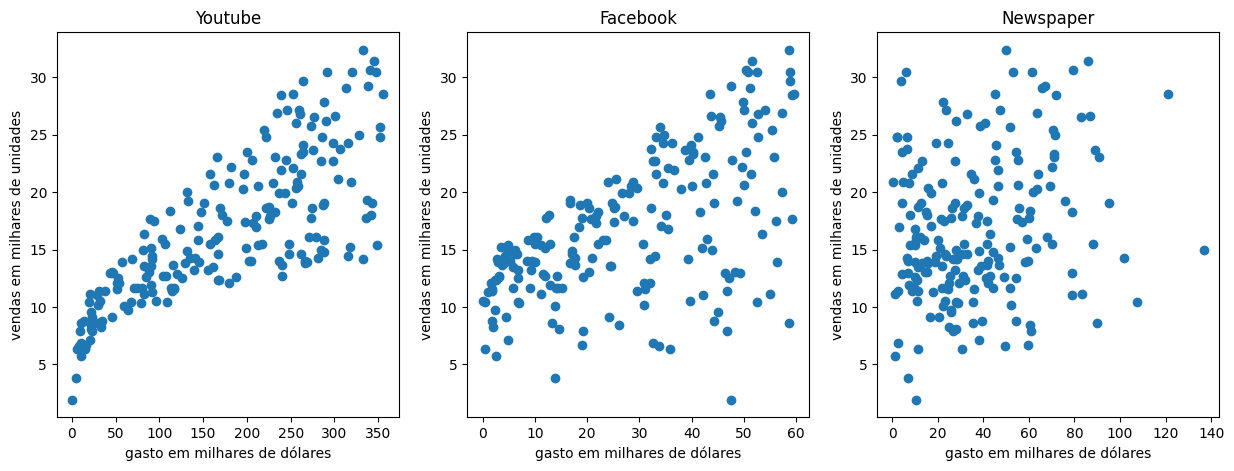

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df.youtube, df.sales)
plt.xlabel("gasto em milhares de dólares")
plt.ylabel("vendas em milhares de unidades")
plt.title("Youtube")

plt.subplot(132)
plt.scatter(df.facebook, df.sales)
plt.xlabel("gasto em milhares de dólares")
plt.ylabel("vendas em milhares de unidades")
plt.title("Facebook")

plt.subplot(133)
plt.scatter(df.newspaper, df.sales)
plt.xlabel("gasto em milhares de dólares")
plt.ylabel("vendas em milhares de unidades")
plt.title("Newspaper")

plt.show()


### **Ajuste de regressão linear múltiplo** 

O modelo de regressão linear múltiplo com o método dos mínimos quadrados ordinário, através da biblioteca ``statsmodels`` é dado por:

In [21]:
### Função utilitária para fazer a regressão com constante adicionada


def regress(Y, X):
    """
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    """
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y, X_cp)
    results = model.fit()

    return results

In [22]:
X = df[["youtube", "facebook", "newspaper"]]
Y = df["sales"]

In [23]:
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        10:23:49   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.000       2.789       4.265
youtube        0.0458      0.001     32.809      0.000       0.043       0.049
facebook       0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

<div id="q1_b"></div>


**b)** Segundo o relatório sumário do modelo, quais coeficientes são relevantes? Podemos afirmar que existe uma relação entre cada mída publicitária e vendas? Explique detalhadamente usando o valor-p do teste nas suas conclusões.

In [ ]:
# Como valor-p do teste dos coeficientes atrelados as variáveis youtube e facebook são < 0.001, há evidências de que as vendas mudam conforme 
# aumento em gastos com essas duas mídas publicitárias. Já o coeficiente atrelado à variáve newspaper tem valor-p = 0,86 que é maior 
# do que qualquer nível de significância razoável (máximo de 10%). Com isso, não há evidências 
# de que o gasto com essa mídia publicitária traz mudanças nas vendas, com 90% de coeficiente de confiança.


---

<div id="q1_c"></div>

**c)** Quais suposições do modelo de regressão linear estão satisfeitas e quais não foram satisfeitas neste problema?

    1. Erros com distribuição normal
    2. Erros independentes
    3. Modelo linear nos parâmetros
    4. Homocedasticidade

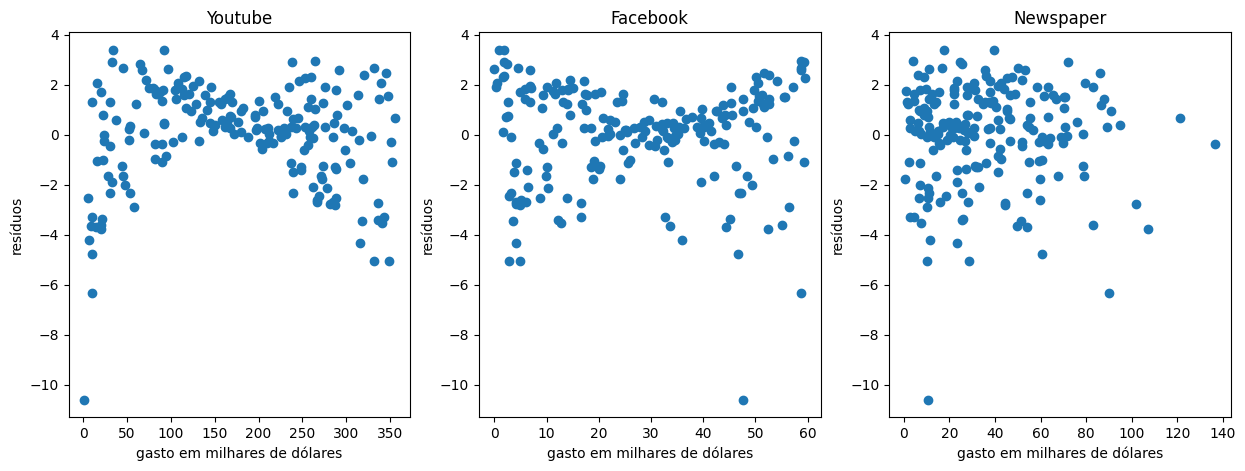

In [25]:
# 1. pelos testes omnibus e jarque-bera, há evidências de que os resíduos não seguem uma distribuição normal. (ruim)
# 2. como o teste de durbin-watson é próximo de 2, não há evidências de que os resíduos não são independentes. (bom)

residuos = results.resid
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df.youtube, residuos)
plt.xlabel("gasto em milhares de dólares")
plt.ylabel("resíduos")
plt.title("Youtube")

plt.subplot(132)
plt.scatter(df.facebook,  residuos)
plt.xlabel("gasto em milhares de dólares")
plt.ylabel("resíduos")
plt.title("Facebook")

plt.subplot(133)
plt.scatter(df.newspaper,  residuos)
plt.xlabel("gasto em milhares de dólares")
plt.ylabel("resíduos")
plt.title("Newspaper")

plt.show()


# 3. o modelo não é necessariamente linear, pois observamos uma disposição não linear (quadrática) de alguns resíduos em relação à variável explicativa. (ruim)
# 4. há uma violação da homocedasticidade, pois observamos que os resíduos não são constantes em relação à variável explicativa. eles deveriam se organizar em torno de uma linha horizontal. (ruim)



___

<div id="q2"></div>

# Questão 2
## Conjunto de Dados: Seguro Saúde

<img src="./doctor.jpg" width=100% alt="Fonte: https://atchealthcarerhr.com/wp-content/uploads/2018/08/iStock-695218436-e1534801414819.jpg"> </img>

O arquivo `insurance.csv` possui dados de custos médicos individuais cobrados por seguro de saúde. Esta base foi disponibilizada por [Miri Choi](https://www.kaggle.com/mirichoi0218/insurance) no Kaggle.

As variáveis contidas no *dataset* são:

- `age`: idade do beneficiário;
- `sex`: gênero do beneficiário;
- `bmi`: índice de massa corporal (IMC) em $kg/m^2$;
- `children`: número de crianças/dependentes cobertos pelo seguro;
- `smoker`: fumante;
- `region`: área residencial do beneficiário (nos EUA);
- `charges`: custos médicos individuais.

Vamos começar carregando os dados.

In [10]:
dados = pd.read_csv('insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


___

<br>

**Responda:**

---

<div id="q2_a"></div>

**a)** Construa 2 gráficos de dispersão para analisar a relação das variáveis `age` e `bmi` com os custos médicos (`charges`). Em cada gráfico, separe os dados dos beneficiários fumantes dos não fumantes utilizando cores distintas. Deve ser possível identificar o que cada gráfico representa sem consultar o código, ou seja, os gráficos devem possuir títulos, no mínimo.

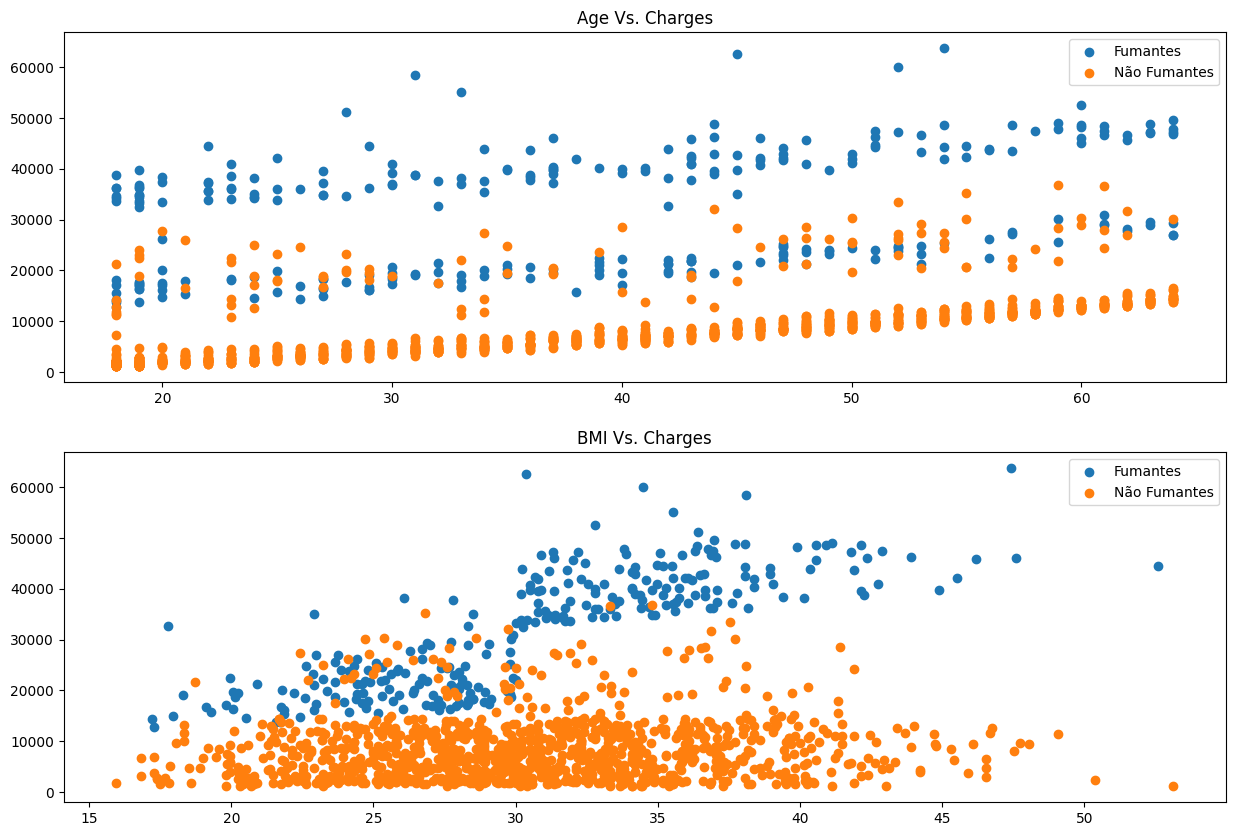

In [26]:
fumantes = dados[(dados.smoker == 'yes')]
nao_fumantes = dados[(dados.smoker == 'no')]
todos = [fumantes, nao_fumantes]

plt.figure(figsize=(15, 10))
plt.subplot(211)
for d in todos:
    plt.scatter(d['age'], d['charges']);
plt.title('Age Vs. Charges')
plt.legend(('Fumantes','Não Fumantes'),loc='best')

plt.subplot(212)
for d in todos:
    plt.scatter(d['bmi'], d['charges']);
plt.title('BMI Vs. Charges')
plt.legend(('Fumantes','Não Fumantes'),loc='best')

plt.show()

---

<div id="q2_b"></div>

**b)** Considerando apenas os fumantes na análise, ajuste um modelo linear múltiplo utilizando as variáveis `age` e `bmi` para explicar a variável `charges`. Baseado no resultado do ajuste, quais variáveis são relevantes para explicar a variável `charges`? Explique como chegou a essa conclusão.

In [28]:
X = fumantes[['age', 'bmi']]
Y = fumantes['charges']

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     413.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.50e-83
Time:                        10:45:56   Log-Likelihood:                -2759.5
No. Observations:                 274   AIC:                             5525.
Df Residuals:                     271   BIC:                             5536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.237e+04   1931.856    -11.578      0.000   -2.62e+04   -1.86e+04
age          266.2922     25.058     10.627      0.000     216.958     315.626
bmi         1438.0910     55.216     26.045      0.000    1329.384    1546.798
==============================================================================
Omnibus:                       57.754   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.351
Skew:                           1.011   Prob(JB):                     1.82e-29
Kurtosis:                       5.739   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    Ambas são relevantes para explicar a variável charges, tendo em vista o p-value de cada uma.

---

<div id="q2_c"></div>

**c)** A partir dos valores `Prob(Omnibus)` e `Prob(JB)` obtidos no item **b**, o que podemos concluir?

    Os resíduos não seguem uma distribuição normal.

___

<div id="q3"></div>

# Questão 3

## Usina Termoelétrica


Uma usina termoelétrica converte calor (gerado pela queima de combustível) em energia mecânica, e esta para energia elétrica. Turbinas são impulsionadas por gases em expansão (vapor d'água, por exemplo), girando um eixo que está acoplado a um gerador elétrico. Esses gases são resfriados através da troca de calor com o meio ambiente, e retornam ao ciclo para serem novamente aquecidos, se expandirem, moverem as turbinas, etc.

<img src='Rankine_cycle_layout.png' width=800></img>

https://en.wikipedia.org/wiki/Rankine_cycle

De acordo com a teoria da Termodinâmica, quanto menor a temperatura ambiente, mais eficiente será a geração de energia. Queremos investigar a validade dessa teoria com dados reais.

O dataframe a seguir contem dados sobre a potência gerada por uma usina termoelétrica real e a temperatura ambiente.

In [29]:
df = pd.read_csv('power.csv')

In [30]:
df.head()

,Temp. Ambiente,Potência Gerada
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90


---

<div id="q3_a"></div>

**a)** Construa uma visualização adequada dos dados para este problema.

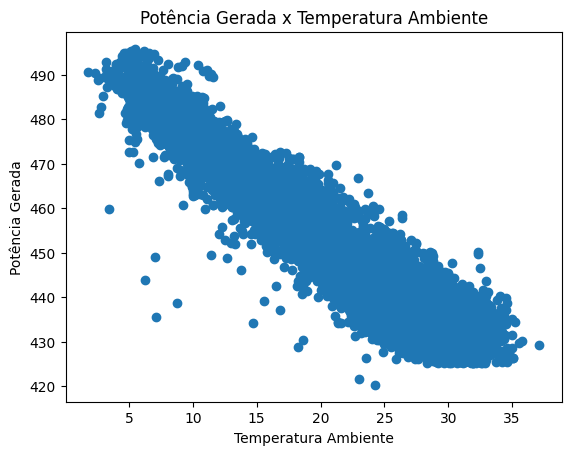

In [33]:
plt.figsize=(15, 5)
plt.scatter(df['Temp. Ambiente'], df['Potência Gerada'])
plt.xlabel('Temperatura Ambiente')
plt.ylabel('Potência Gerada')
plt.title('Potência Gerada x Temperatura Ambiente')
plt.show()

---

<div id="q3_b"></div>

**b)** Ajuste um modelo de regressão linear simples com o método dos mínimos quadrados ordinário, através da biblioteca ``statsmodels``, e mostre o relatório sumário do ajuste do modelo.

In [34]:
regression = sm.OLS(df['Potência Gerada'], df['Temp. Ambiente'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Potência Gerada   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          5.405e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:53:10   Log-Likelihood:                         -63065.
No. Observations:                9568   AIC:                                  1.261e+05
Df Residuals:                    9567   BIC:                                  1.261e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Temp. Ambiente    19.9415      0.086    232.492      0.000      19.773      20.110
==============================================================================
Omnibus:                     3063.612   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.616
Skew:                           0.163   Prob(JB):                    7.91e-107
Kurtosis:                       1.942   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

<div id="q3_c"></div>

**c)** Segundo o relatório sumário do modelo, quais coeficientes são relevantes? Podemos afirmar que existe uma relação entre a temperatura ambiente e a potência gerada?

    Sim, há uma relação entre temperatura ambiente e potência gerada, visto que o p-value dessa variável independente é menor que o nível de significância.

---

<div id="q3_d"></div>

**d)** Quais suposições do modelo de regressão linear estão satisfeitas e quais não foram satisfeitas neste problema?

    1. Erros com distribuição normal
    2. Erros independentes
    3. Modelo linear nos parâmetros
    4. Homocedasticidade

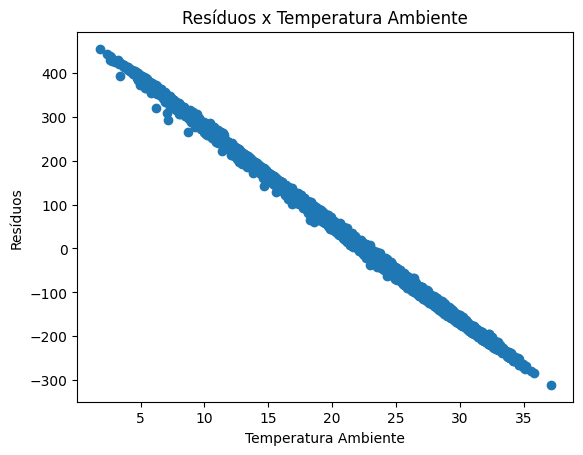

In [35]:
# 1. os resíduos não seguem uma distribuição normal, tal como evidenciado pelos testes omnibus e jarque-bera.
# 2. os resíduos podem ser considerados independentes, pois o teste de durbin-watson é próximo de 2.

residuos = results.resid
plt.scatter(df['Temp. Ambiente'], residuos)
plt.xlabel('Temperatura Ambiente')
plt.ylabel('Resíduos')
plt.title('Resíduos x Temperatura Ambiente')
plt.show()

# 3. o modelo pode ser considerado linear, pois os resíduos apresentam uma disposição linear em relação à variável explicativa.
# 4. há uma violação da homocedasticidade, pois os resíduos não são constantes em relação à variável explicativa. eles deveriam se organizar em torno de uma linha horizontal.

<img src='homocedasticidade.png' width=500></img>